In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.api as smt

## ARIMA

In [28]:
air= pd.read_csv('Air Passengers.csv',index_col='Month',parse_dates=True)

In [29]:
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


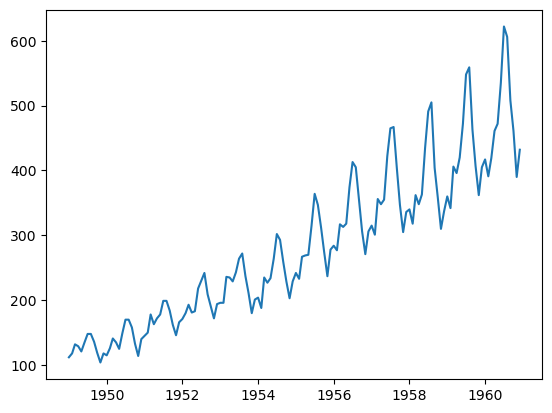

In [31]:
plt.plot(air)

In [32]:
result= seasonal_decompose(air['#Passengers'],model='multiplicative')

<Axes: xlabel='Month'>

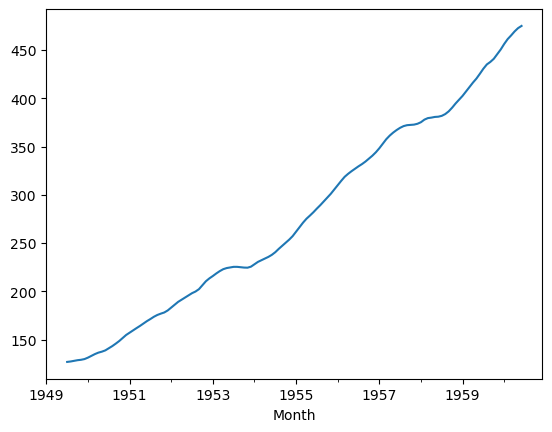

In [33]:
result.trend.plot()

<Axes: xlabel='Month'>

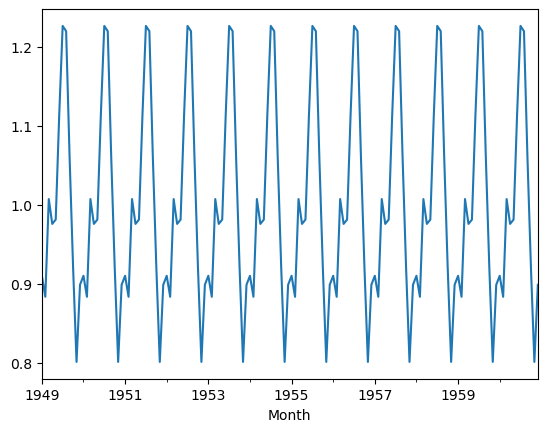

In [34]:
result.seasonal.plot()

<Axes: xlabel='Month'>

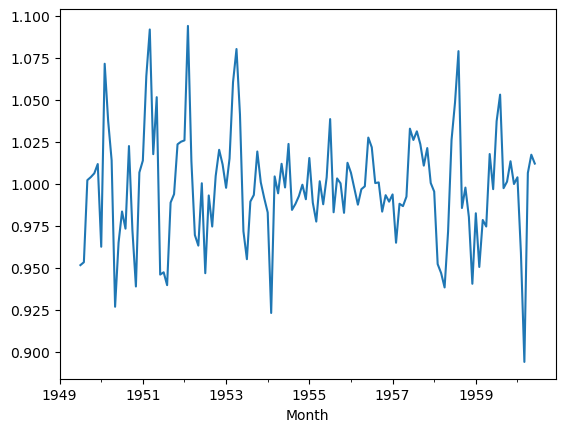

In [35]:
result.resid.plot()

In [36]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


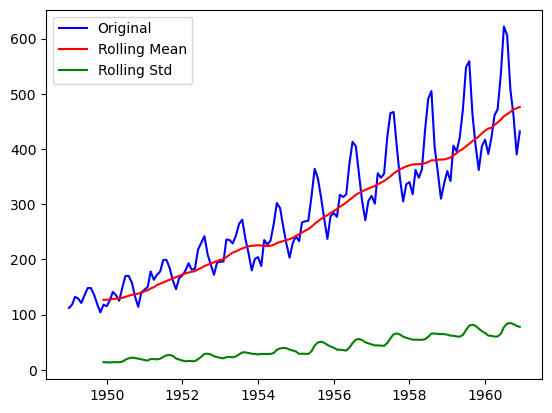

In [37]:
test_stationarity(air['#Passengers'])

### Differencing

In [38]:
air['Air_Diff']= air['#Passengers']-air['#Passengers'].shift(12)

In [39]:
air

,#Passengers,Air_Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


In [40]:
air.dropna(inplace=True)

In [41]:
air

,#Passengers,Air_Diff
Month,,
1950-01-01,115,3.0
1950-02-01,126,8.0
1950-03-01,141,9.0
1950-04-01,135,6.0
1950-05-01,125,4.0
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


Results of Dickey-Fuller Test :

Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


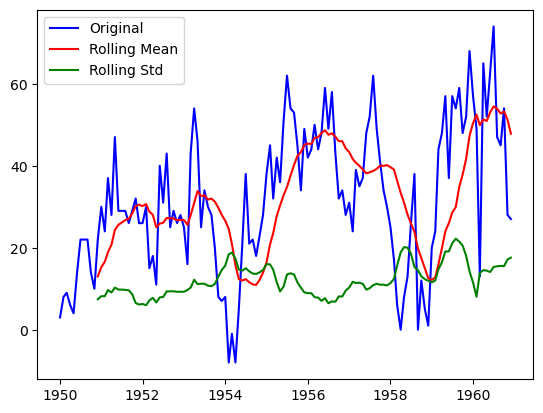

In [42]:
test_stationarity(air['Air_Diff'])

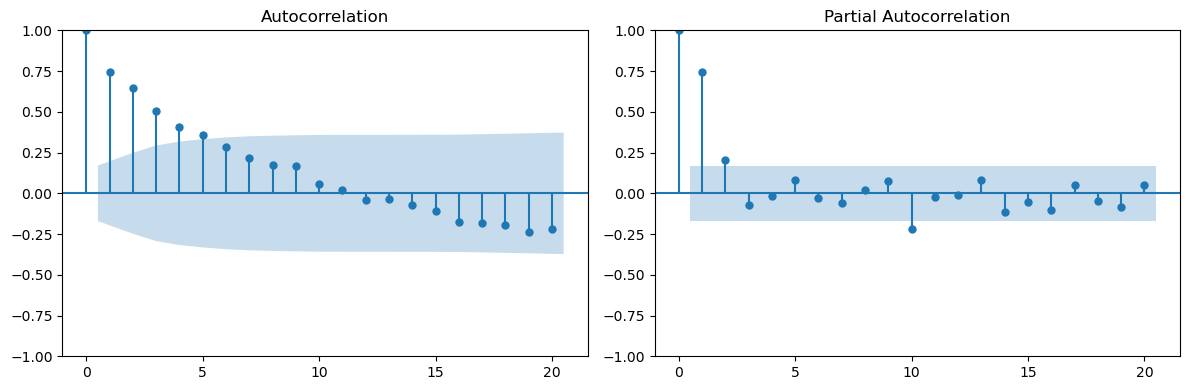

In [43]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(air['Air_Diff'], lags=20, ax=axes[0])
smt.graphics.plot_pacf(air['Air_Diff'], lags=20, ax=axes[1])
plt.tight_layout()

In [44]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(air['#Passengers'], order=(2,1,1))

In [45]:
air.columns

Index(['#Passengers', 'Air_Diff'], dtype='object')

In [46]:
result= model.fit()

In [47]:
result.predict()

1950-01-01      0.000000
1950-02-01    115.044344
1950-03-01    129.412703
1950-04-01    143.960568
1950-05-01    127.816801
                 ...    
1960-08-01    614.729959
1960-09-01    553.314368
1960-10-01    447.076288
1960-11-01    445.884856
1960-12-01    382.661779
Freq: MS, Name: predicted_mean, Length: 132, dtype: float64

In [48]:
result.forecast(20)

1961-01-01    470.955734
1961-02-01    492.939198
1961-03-01    497.878187
1961-04-01    492.511339
1961-05-01    484.232927
1961-06-01    477.819447
1961-07-01    474.867722
1961-08-01    474.783561
1961-09-01    476.136465
1961-10-01    477.655100
1961-11-01    478.651307
1961-12-01    478.995874
1962-01-01    478.884534
1962-02-01    478.594286
1962-03-01    478.331820
1962-04-01    478.187264
1962-05-01    478.157874
1962-06-01    478.196535
1962-07-01    478.253142
1962-08-01    478.296035
Freq: MS, Name: predicted_mean, dtype: float64

In [50]:
air['predicted']=result.predict()

In [51]:
forecast=result.forecast(20)
forecast

1961-01-01    470.955734
1961-02-01    492.939198
1961-03-01    497.878187
1961-04-01    492.511339
1961-05-01    484.232927
1961-06-01    477.819447
1961-07-01    474.867722
1961-08-01    474.783561
1961-09-01    476.136465
1961-10-01    477.655100
1961-11-01    478.651307
1961-12-01    478.995874
1962-01-01    478.884534
1962-02-01    478.594286
1962-03-01    478.331820
1962-04-01    478.187264
1962-05-01    478.157874
1962-06-01    478.196535
1962-07-01    478.253142
1962-08-01    478.296035
Freq: MS, Name: predicted_mean, dtype: float64

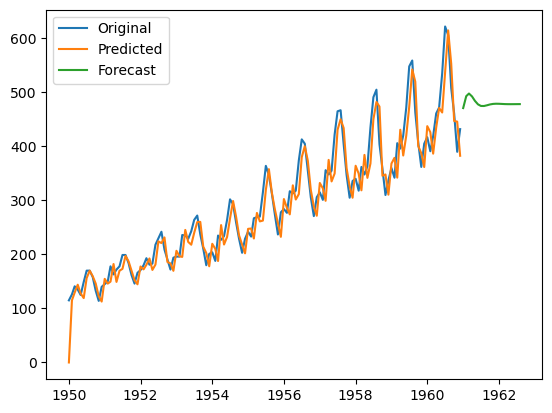

In [52]:
plt.plot(air['#Passengers'],label='Original')
plt.plot(air['predicted'],label='Predicted')
plt.plot(forecast,label='Forecast')
plt.legend()